In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import os
import yaml

from tqdm.notebook import tqdm

import pickle


In [2]:
#with open('h5_cosmics_with_segment_angles.pkl', 'rb') as f:
#    df = pickle.load(f)

with open('h5_highEmuon_with_segment_angles.pkl', 'rb') as f:
    df = pickle.load(f)

df


,file,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,reco_mcs_ke,reco_csda_ke,reco_calo_ke,reco_segment_dirs,reco_segment_angles,true_segment_dirs,true_segment_angles
0,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[30.149994, -111.75, 5.1499977]","[30.149994, -112.05, 5.450001]","[-0.15927163, 0.78837264, 0.59422314]","[-0.16810295, 0.80677176, 0.56644565]",99998.359695,1168.288896,1168.288896,902.203877,829.255615,"[[-0.19071268, 0.826427, 0.5297613], [-0.15151...","[0.07099739, 0.020732421, 0.05218969, 0.079851...","[[-0.19071268, 0.826427, 0.5297613], [-0.15151...","[0.07099739, 0.020732421, 0.05218969, 0.079851..."
1,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-161.65, 176.21774, 252.44998]","[-145.95001, 151.95001, 280.55002]","[0.391234, -0.59747154, 0.69997406]","[0.39829403, -0.5943896, 0.69861495]",100003.303772,99999.997218,99999.997218,736.306847,702.686401,"[[0.40702942, -0.57840943, 0.70694387], [0.407...","[7.97038e-07, 0.029936364, 0.029429799, 0.0293...","[[0.38402247, -0.59736854, 0.70404375], [0.385...","[0.060110416, 0.106258065, 0.036266964, 0.0638..."
2,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[184.95001, 135.75, 336.65]","[184.95001, 135.75, 336.65002]","[-0.23169029, -0.32728773, -0.9160799]","[-0.22947192, -0.32301685, -0.9181518]",99998.404196,5895.426743,5895.426743,825.590635,780.842407,"[[0.23478901, 0.32016507, 0.9178063], [0.21386...","[0.07056688, 0.08997677, 0.0005644565, 0.09074...","[[0.23478901, 0.32016507, 0.9178063], [0.21386...","[0.07056688, 0.08997677, 0.06708555, 0.0521863..."
3,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-46.350006, 152.85, 266.74997]","[-46.350006, 153.45001, 266.75003]","[0.21591356, -0.9702141, -0.1098446]","[0.21547125, -0.9692011, -0.119253315]",99998.406552,1361.322301,1361.322301,828.109456,839.838745,"[[-0.23548526, 0.9633524, 0.1284483], [-0.2354...","[2.446163e-06, 0.06985905, 0.043946907, 0.0297...","[[-0.23548526, 0.9633524, 0.1284483], [-0.2354...","[2.446163e-06, 0.06985905, 0.043946907, 0.0297..."
4,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-59.850006, 36.75, 477.35]","[-59.850006, 37.049988, 477.05002]","[0.9264932, -0.28152186, -0.24971114]","[0.9209161, -0.29293114, -0.25710893]",99998.381833,1716.389589,1716.389589,641.247402,604.351013,"[[-0.9226938, 0.2726134, 0.2726134], [-0.93502...","[0.0448706, 0.029579625, 0.0132398205, 0.05181...","[[-0.9226938, 0.2726134, 0.2726134], [-0.93502...","[0.0448706, 0.029579625, 0.0132398205, 0.05181..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,larcv_mc_20250625_005342_173636_1e82d74a-e424-...,False,False,True,True,"[-163.05, 92.55002, 372.65]","[-163.05, 92.55002, 372.65002]","[0.44401732, -0.8560198, -0.26472372]","[0.44722262, -0.853316, -0.2680368]",100003.260975,991.915494,991.915494,784.177441,832.365723,"[[-0.44925493, 0.85572535, 0.25671804], [-0.44...","[0.020525206, 0.020342184, 0.07901565, 0.11412...","[[-0.44925493, 0.85572535, 0.25671804], [-0.44...","[0.020525206, 0.020342184, 0.07901565, 0.11412..."
2535,larcv_mc_20250625_005342_173636_1e82d74a-e424-...,False,False,True,True,"[-184.45001, -84.78224, 94.950005]","[-184.35, -84.75, 95.15]","[0.7189571, 0.6311895, 0.29103345]","[0.72078776, 0.6305699, 0.28783086]",99998.419277,1352.773186,1352.773186,1029.280834,1117.065186,"[[0.72603846, 0.61926806, 0.29895687], [0.7111...","[0.04230699, 0.020746492, 0.050813742, 0.06359...","[[0.72603846, 0.61926806, 0.29895687], [0.7111...","[0.04230699, 0.020746492, 0.050813742, 0.06359..."
2536,larcv_mc_20250625_005342_173636_1e82d74a-e424-...,False,False,True,True,"[-86.850006, 85.350006, 213.05002]","[-86.850006, 85.350006, 213.05002]","[0.705558, -0.707023, 0.04802431]","[0.69891304, -0.71361697, 0.047657922]",100003.238254,955.810361

In [3]:
reco_3d_angles = []
reco_2d_angle_xy = []
reco_2d_angle_yz = []
reco_2d_angle_xz = []
reco_2d_angle_x_muondir = []
reco_2d_angle_perpx_muondir = []

true_3d_angles = []
true_2d_angle_xy = []
true_2d_angle_yz = []
true_2d_angle_xz = []
true_2d_angle_x_muondir = []
true_2d_angle_perpx_muondir = []

reco_segment_dirs = df["reco_segment_dirs"].to_numpy()
muon_dir = df["reco_start_dir"].to_numpy()
true_segment_dirs = df["true_segment_dirs"].to_numpy()
x_axis = np.array([1.0, 0.0, 0.0])
for event_i in tqdm(range(len(reco_segment_dirs))):
    event_reco_segment_dirs = reco_segment_dirs[event_i]
    event_muon_dir = muon_dir[event_i]

    event_reco_3d_angles = []
    event_reco_2d_angle_xy = []
    event_reco_2d_angle_yz = []
    event_reco_2d_angle_xz = []
    event_reco_2d_angle_x_muondir = []
    event_reco_2d_angle_perpx_muondir = []
    event_true_3d_angles = []
    event_true_2d_angle_xy = []
    event_true_2d_angle_yz = []
    event_true_2d_angle_xz = []
    event_true_2d_angle_x_muondir = []
    event_true_2d_angle_perpx_muondir = []
    for segment_i in range(len(event_reco_segment_dirs) - 1):

        segment_1_dir_3d = event_reco_segment_dirs[segment_i]
        segment_2_dir_3d = event_reco_segment_dirs[segment_i + 1]
        event_reco_3d_angles.append(np.arccos(np.dot(segment_1_dir_3d, segment_2_dir_3d)))

        # For xy plane
        segment_1_dir_xy = np.array([segment_1_dir_3d[0], segment_1_dir_3d[1]])
        segment_2_dir_xy = np.array([segment_2_dir_3d[0], segment_2_dir_3d[1]])
        angle_xy = np.arctan2(np.cross(segment_1_dir_xy, segment_2_dir_xy), np.dot(segment_1_dir_xy, segment_2_dir_xy))
        event_reco_2d_angle_xy.append(angle_xy)

        # For yz plane  
        segment_1_dir_yz = np.array([segment_1_dir_3d[1], segment_1_dir_3d[2]])
        segment_2_dir_yz = np.array([segment_2_dir_3d[1], segment_2_dir_3d[2]])
        angle_yz = np.arctan2(np.cross(segment_1_dir_yz, segment_2_dir_yz), np.dot(segment_1_dir_yz, segment_2_dir_yz))
        event_reco_2d_angle_yz.append(angle_yz)

        # For xz plane
        segment_1_dir_xz = np.array([segment_1_dir_3d[0], segment_1_dir_3d[2]])
        segment_2_dir_xz = np.array([segment_2_dir_3d[0], segment_2_dir_3d[2]])
        angle_xz = np.arctan2(np.cross(segment_1_dir_xz, segment_2_dir_xz), np.dot(segment_1_dir_xz, segment_2_dir_xz))
        event_reco_2d_angle_xz.append(angle_xz)

        # (u1, u2) is the orthonormal basis of the plane spanned by (x_axis, event_muon_dir)
        u1 = x_axis
        mu_perp = event_muon_dir - np.dot(event_muon_dir, u1) * u1
        u2 = mu_perp / np.linalg.norm(mu_perp)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        angle_x_muondir = np.arctan2(np.cross(seg1_proj, seg2_proj), np.dot(seg1_proj, seg2_proj))
        event_reco_2d_angle_x_muondir.append(angle_x_muondir)

        # cross product of x_axis and mu_dir
        u1 = event_muon_dir
        u1 /= np.linalg.norm(u1)
        cross = np.cross(x_axis, event_muon_dir)
        u2 = cross - np.dot(cross, u1) * u1
        u2 /= np.linalg.norm(u2)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        angle_perpx_muondir = np.arctan2(np.cross(seg1_proj, seg2_proj), np.dot(seg1_proj, seg2_proj))
        event_reco_2d_angle_perpx_muondir.append(angle_perpx_muondir)

    event_true_segment_dirs = true_segment_dirs[event_i]
    for segment_i in range(len(event_true_segment_dirs) - 1):

        segment_1_dir_3d = event_true_segment_dirs[segment_i]
        segment_2_dir_3d = event_true_segment_dirs[segment_i + 1]
        event_true_3d_angles.append(np.arccos(np.dot(segment_1_dir_3d, segment_2_dir_3d)))

        # For xy plane
        segment_1_dir_xy = np.array([segment_1_dir_3d[0], segment_1_dir_3d[1]])
        segment_2_dir_xy = np.array([segment_2_dir_3d[0], segment_2_dir_3d[1]])
        event_true_2d_angle_xy.append(angle_xy)

        # For yz plane
        segment_1_dir_yz = np.array([segment_1_dir_3d[1], segment_1_dir_3d[2]])
        segment_2_dir_yz = np.array([segment_2_dir_3d[1], segment_2_dir_3d[2]])
        event_true_2d_angle_yz.append(angle_yz)

        # For xz plane
        segment_1_dir_xz = np.array([segment_1_dir_3d[0], segment_1_dir_3d[2]])
        segment_2_dir_xz = np.array([segment_2_dir_3d[0], segment_2_dir_3d[2]])
        event_true_2d_angle_xz.append(angle_xz)

        # (u1, u2) is the orthonormal basis of the plane spanned by (x_axis, event_muon_dir)
        u1 = x_axis
        mu_perp = event_muon_dir - np.dot(event_muon_dir, u1) * u1
        u2 = mu_perp / np.linalg.norm(mu_perp)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        event_true_2d_angle_x_muondir.append(angle_x_muondir)

        # cross product of x_axis and mu_dir
        u1 = event_muon_dir
        u1 /= np.linalg.norm(u1)
        cross = np.cross(x_axis, event_muon_dir)
        u2 = cross - np.dot(cross, u1) * u1
        u2 /= np.linalg.norm(u2)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        event_true_2d_angle_perpx_muondir.append(angle_perpx_muondir)
        
        
    reco_3d_angles.append(np.array(event_reco_3d_angles))
    reco_2d_angle_xy.append(np.array(event_reco_2d_angle_xy))
    reco_2d_angle_yz.append(np.array(event_reco_2d_angle_yz))
    reco_2d_angle_xz.append(np.array(event_reco_2d_angle_xz))
    reco_2d_angle_x_muondir.append(np.array(event_reco_2d_angle_x_muondir))
    reco_2d_angle_perpx_muondir.append(np.array(event_reco_2d_angle_perpx_muondir))

    true_3d_angles.append(np.array(event_true_3d_angles))
    true_2d_angle_xy.append(np.array(event_true_2d_angle_xy))
    true_2d_angle_yz.append(np.array(event_true_2d_angle_yz))
    true_2d_angle_xz.append(np.array(event_true_2d_angle_xz))
    true_2d_angle_x_muondir.append(np.array(event_true_2d_angle_x_muondir))
    true_2d_angle_perpx_muondir.append(np.array(event_true_2d_angle_perpx_muondir))

df["reco_3d_angles"] = reco_3d_angles
df["reco_2d_angle_xy"] = reco_2d_angle_xy
df["reco_2d_angle_yz"] = reco_2d_angle_yz
df["reco_2d_angle_xz"] = reco_2d_angle_xz
df["reco_2d_angle_x_muondir"] = reco_2d_angle_x_muondir
df["reco_2d_angle_perpx_muondir"] = reco_2d_angle_perpx_muondir

df["true_3d_angles"] = true_3d_angles
df["true_2d_angle_xy"] = true_2d_angle_xy
df["true_2d_angle_yz"] = true_2d_angle_yz
df["true_2d_angle_xz"] = true_2d_angle_xz
df["true_2d_angle_x_muondir"] = true_2d_angle_x_muondir
df["true_2d_angle_perpx_muondir"] = true_2d_angle_perpx_muondir


  0%|          | 0/2539 [00:00<?, ?it/s]

/tmp/ipykernel_2762899/3422271160.py:44: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_xy = np.arctan2(np.cross(segment_1_dir_xy, segment_2_dir_xy), np.dot(segment_1_dir_xy, segment_2_dir_xy))
/tmp/ipykernel_2762899/3422271160.py:50: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_yz = np.arctan2(np.cross(segment_1_dir_yz, segment_2_dir_yz), np.dot(segment_1_dir_yz, segment_2_dir_yz))
/tmp/ipykernel_2762899/3422271160.py:56: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_xz = np.arctan2(np.cross(segment_1_dir_xz, segment_2_dir_xz), np.dot(segment_1_dir_xz, segment_2_dir_xz))
/tmp/ipykernel_2762899/3422271160.py:67: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use array

In [4]:
true_start_dir = df["true_start_dir"].to_numpy()
start_dir_x = np.array([d[0] for d in true_start_dir])
start_dir_y = np.array([d[1] for d in true_start_dir])
start_dir_z = np.array([d[2] for d in true_start_dir])

df["true_angle_from_x_dir"] = np.arccos(start_dir_x / np.sqrt(start_dir_x**2 + start_dir_y**2 + start_dir_z**2)) * 180 / np.pi
df["true_angle_from_x_axis"] = 90 - np.abs(df["true_angle_from_x_dir"].to_numpy() - 90)


In [5]:
all_angles = df['reco_segment_angles'].to_numpy() * 180 / np.pi
median_angles = []
spread_angles_68 = []
for event_angles in all_angles:
    if len(event_angles) == 0:
        median_angles.append(np.nan)
    else:
        median_angles.append(np.median(event_angles))
df['median_reco_segment_angle'] = median_angles

all_angles = df['true_segment_angles'].to_numpy() * 180 / np.pi
median_angles = []
spread_angles_68 = []
for event_angles in all_angles:
    if len(event_angles) == 0:
        median_angles.append(np.nan)
    else:
        median_angles.append(np.median(event_angles))
df['median_true_segment_angle'] = median_angles

In [6]:
high_energy_df = df.query('truth_ke > 5_000')
print(len(high_energy_df))
high_energy_df.head()

2537


,file,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,...,true_3d_angles,true_2d_angle_xy,true_2d_angle_yz,true_2d_angle_xz,true_2d_angle_x_muondir,true_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle,median_true_segment_angle
0,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[30.149994, -111.75, 5.1499977]","[30.149994, -112.05, 5.450001]","[-0.15927163, 0.78837264, 0.59422314]","[-0.16810295, 0.80677176, 0.56644565]",99998.359695,...,"[0.0709973, 0.020733647, 0.052190375, 0.079851...","[-0.0058288854, -0.0058288854, -0.0058288854, ...","[-0.47768506, -0.47768506, -0.47768506, -0.477...","[0.49710405, 0.49710405, 0.49710405, 0.4971040...","[0.056543971263127046, 0.056543971263127046, 0...","[-0.46781988213872544, -0.46781988213872544, -...",99.164619,80.835381,4.227740,4.576525
1,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-161.65, 176.21774, 252.44998]","[-145.95001, 151.95001, 280.55002]","[0.391234, -0.59747154, 0.69997406]","[0.39829403, -0.5943896, 0.69861495]",100003.303772,...,"[0.06010931, 0.10625761, 0.036266528, 0.063848...","[1.4871988, 1.4871988, 1.4871988, 1.4871988, 1...","[-0.9098002, -0.9098002, -0.9098002, -0.909800...","[0.31457162, 0.31457162, 0.31457162, 0.3145716...","[0.07622408659502396, 0.07622408659502396, 0.0...","[-0.8781740059430877, -0.8781740059430877, -0....",66.968689,66.968689,2.759628,3.590822
2,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[184.95001, 135.75, 336.65]","[184.95001, 135.75, 336.65002]","[-0.23169029, -0.32728773, -0.9160799]","[-0.22947192, -0.32301685, -0.9181518]",99998.404196,...,"[0.07056579, 0.08997554, 0.06708508, 0.0521869...","[0.093119524, 0.093119524, 0.093119524, 0.0931...","[-0.029060662, -0.029060662, -0.029060662, -0....","[0.023559004, 0.023559004, 0.023559004, 0.0235...","[-0.024648972478994065, -0.024648972478994065,...","[-0.028272983195677857, -0.028272983195677857,...",103.396606,76.603394,2.731075,2.990059
3,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-46.350006, 152.85, 266.74997]","[-46.350006, 153.45001, 266.75003]","[0.21591356, -0.9702141, -0.1098446]","[0.21547127, -0.96920115, -0.11925332]",99998.406552,...,"[0.0, 0.06985976, 0.043948848, 0.029730165, 0....","[0.004822729, 0.004822729, 0.004822729, 0.0048...","[0.02602708, 0.02602708, 0.02602708, 0.0260270...","[-0.07308077, -0.07308077, -0.07308077, -0.073...","[-0.004097354127228702, -0.004097354127228702,...","[0.025387474664091057, 0.025387474664091057, 0...",77.530869,77.530869,2.702946,2.517972
4,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-59.850006, 36.75, 477.35]","[-59.850006, 37.049988, 477.05002]","[0.9264932, -0.28152186, -0.24971114]","[0.9209161, -0.29293114, -0.25710893]",99998.381833,...,"[0.044872534, 0.029581413, 0.013237833, 0.0518...","[0.79125804, 0.79125804, 0.79125804, 0.7912580...","[1.4725978, 1.4725978, 1.4725978, 1.4725978, 1...","[-0.35932827, -0.35932827, -0.35932827, -0.359...","[-0.3023187544940329, -0.3023187544940329, -0....","[0.7521984806044557, 0.7521984806044557, 0.752...",22.105381,22.105377,2.747624,2.747624


In [7]:
uncontained_high_energy_df = high_energy_df.query('true_contained == False')
print(len(uncontained_high_energy_df))
uncontained_high_energy_df.head()


2532


,file,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,...,true_3d_angles,true_2d_angle_xy,true_2d_angle_yz,true_2d_angle_xz,true_2d_angle_x_muondir,true_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle,median_true_segment_angle
0,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[30.149994, -111.75, 5.1499977]","[30.149994, -112.05, 5.450001]","[-0.15927163, 0.78837264, 0.59422314]","[-0.16810295, 0.80677176, 0.56644565]",99998.359695,...,"[0.0709973, 0.020733647, 0.052190375, 0.079851...","[-0.0058288854, -0.0058288854, -0.0058288854, ...","[-0.47768506, -0.47768506, -0.47768506, -0.477...","[0.49710405, 0.49710405, 0.49710405, 0.4971040...","[0.056543971263127046, 0.056543971263127046, 0...","[-0.46781988213872544, -0.46781988213872544, -...",99.164619,80.835381,4.227740,4.576525
1,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-161.65, 176.21774, 252.44998]","[-145.95001, 151.95001, 280.55002]","[0.391234, -0.59747154, 0.69997406]","[0.39829403, -0.5943896, 0.69861495]",100003.303772,...,"[0.06010931, 0.10625761, 0.036266528, 0.063848...","[1.4871988, 1.4871988, 1.4871988, 1.4871988, 1...","[-0.9098002, -0.9098002, -0.9098002, -0.909800...","[0.31457162, 0.31457162, 0.31457162, 0.3145716...","[0.07622408659502396, 0.07622408659502396, 0.0...","[-0.8781740059430877, -0.8781740059430877, -0....",66.968689,66.968689,2.759628,3.590822
2,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[184.95001, 135.75, 336.65]","[184.95001, 135.75, 336.65002]","[-0.23169029, -0.32728773, -0.9160799]","[-0.22947192, -0.32301685, -0.9181518]",99998.404196,...,"[0.07056579, 0.08997554, 0.06708508, 0.0521869...","[0.093119524, 0.093119524, 0.093119524, 0.0931...","[-0.029060662, -0.029060662, -0.029060662, -0....","[0.023559004, 0.023559004, 0.023559004, 0.0235...","[-0.024648972478994065, -0.024648972478994065,...","[-0.028272983195677857, -0.028272983195677857,...",103.396606,76.603394,2.731075,2.990059
3,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-46.350006, 152.85, 266.74997]","[-46.350006, 153.45001, 266.75003]","[0.21591356, -0.9702141, -0.1098446]","[0.21547127, -0.96920115, -0.11925332]",99998.406552,...,"[0.0, 0.06985976, 0.043948848, 0.029730165, 0....","[0.004822729, 0.004822729, 0.004822729, 0.0048...","[0.02602708, 0.02602708, 0.02602708, 0.0260270...","[-0.07308077, -0.07308077, -0.07308077, -0.073...","[-0.004097354127228702, -0.004097354127228702,...","[0.025387474664091057, 0.025387474664091057, 0...",77.530869,77.530869,2.702946,2.517972
4,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-59.850006, 36.75, 477.35]","[-59.850006, 37.049988, 477.05002]","[0.9264932, -0.28152186, -0.24971114]","[0.9209161, -0.29293114, -0.25710893]",99998.381833,...,"[0.044872534, 0.029581413, 0.013237833, 0.0518...","[0.79125804, 0.79125804, 0.79125804, 0.7912580...","[1.4725978, 1.4725978, 1.4725978, 1.4725978, 1...","[-0.35932827, -0.35932827, -0.35932827, -0.359...","[-0.3023187544940329, -0.3023187544940329, -0....","[0.7521984806044557, 0.7521984806044557, 0.752...",22.105381,22.105377,2.747624,2.747624


/tmp/ipykernel_2762899/1814020892.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


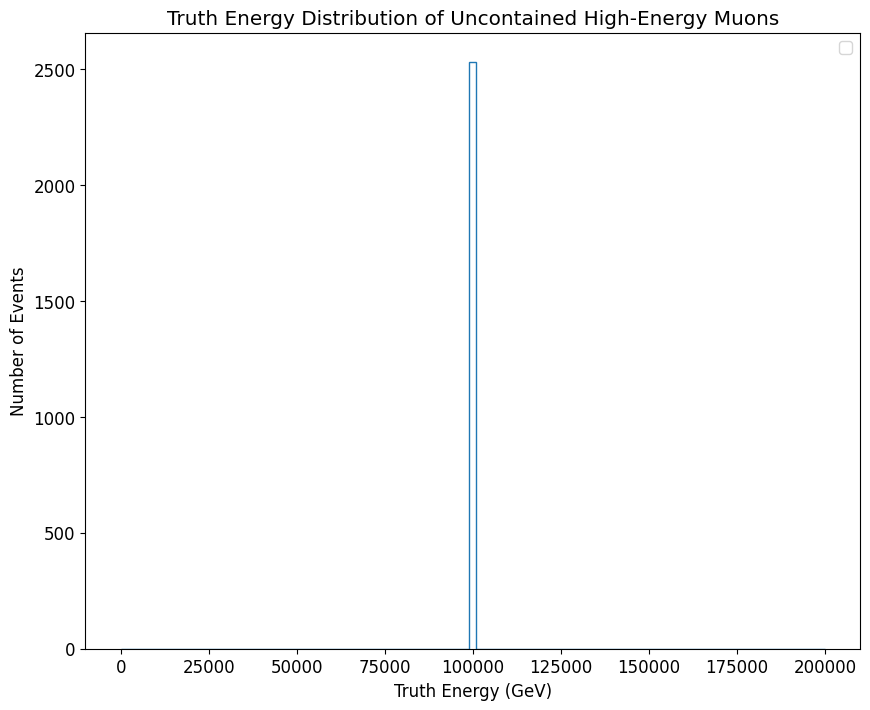

In [8]:
bins = np.linspace(0, 200_000, 100)

mpl.rcParams['font.size'] = 12

plt.figure(figsize=(10, 8))
plt.hist(uncontained_high_energy_df['truth_ke'], bins=bins, histtype='step')
plt.legend()
plt.xlabel('Truth Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('Truth Energy Distribution of Uncontained High-Energy Muons')
plt.show()


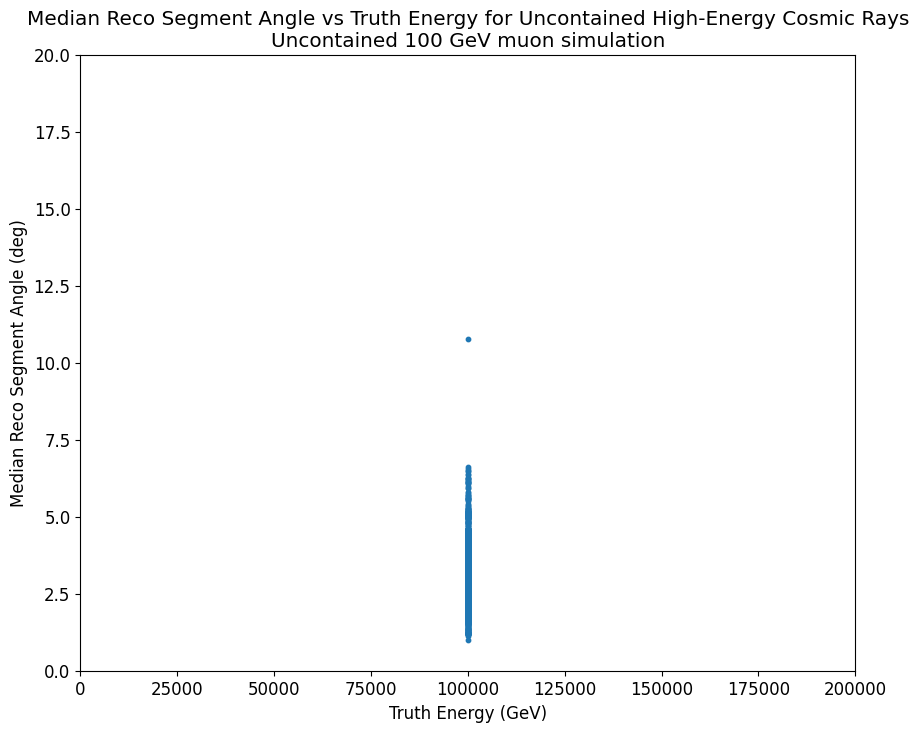

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(uncontained_high_energy_df['truth_ke'], uncontained_high_energy_df['median_reco_segment_angle'], s=10)
plt.xlabel('Truth Energy (GeV)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Reco Segment Angle vs Truth Energy for Uncontained High-Energy Cosmic Rays\nUncontained 100 GeV muon simulation')
plt.xlim(0, 200_000)
plt.ylim(0, 20)
plt.show()



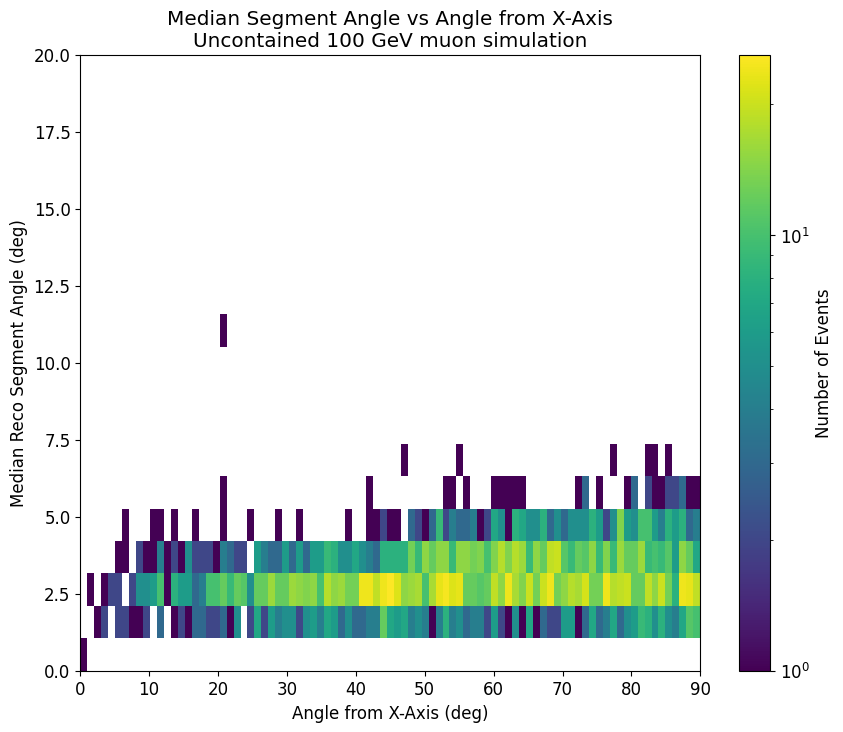

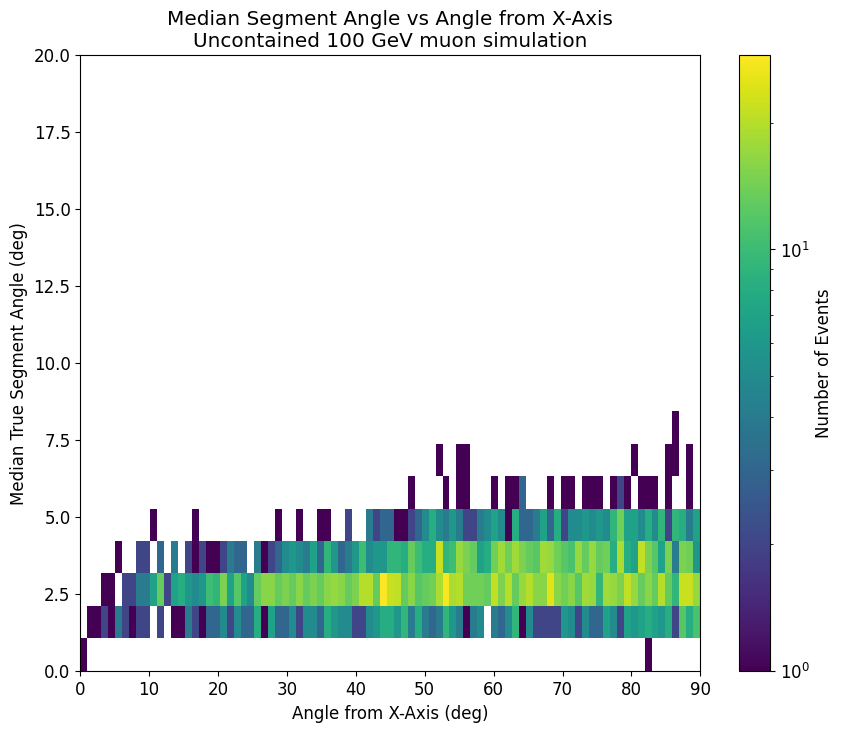

In [10]:
bins = (np.linspace(0, 90, 90), np.linspace(0, 20, 20))
plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_high_energy_df['true_angle_from_x_axis'], 
           uncontained_high_energy_df['median_reco_segment_angle'],
           bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar(label='Number of Events')
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained 100 GeV muon simulation')
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_high_energy_df['true_angle_from_x_axis'], 
           uncontained_high_energy_df['median_true_segment_angle'],
           bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar(label='Number of Events')
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median True Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained 100 GeV muon simulation')
plt.show()

In [11]:
uncontained_high_energy_df.head()

,file,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,...,true_3d_angles,true_2d_angle_xy,true_2d_angle_yz,true_2d_angle_xz,true_2d_angle_x_muondir,true_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle,median_true_segment_angle
0,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[30.149994, -111.75, 5.1499977]","[30.149994, -112.05, 5.450001]","[-0.15927163, 0.78837264, 0.59422314]","[-0.16810295, 0.80677176, 0.56644565]",99998.359695,...,"[0.0709973, 0.020733647, 0.052190375, 0.079851...","[-0.0058288854, -0.0058288854, -0.0058288854, ...","[-0.47768506, -0.47768506, -0.47768506, -0.477...","[0.49710405, 0.49710405, 0.49710405, 0.4971040...","[0.056543971263127046, 0.056543971263127046, 0...","[-0.46781988213872544, -0.46781988213872544, -...",99.164619,80.835381,4.227740,4.576525
1,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-161.65, 176.21774, 252.44998]","[-145.95001, 151.95001, 280.55002]","[0.391234, -0.59747154, 0.69997406]","[0.39829403, -0.5943896, 0.69861495]",100003.303772,...,"[0.06010931, 0.10625761, 0.036266528, 0.063848...","[1.4871988, 1.4871988, 1.4871988, 1.4871988, 1...","[-0.9098002, -0.9098002, -0.9098002, -0.909800...","[0.31457162, 0.31457162, 0.31457162, 0.3145716...","[0.07622408659502396, 0.07622408659502396, 0.0...","[-0.8781740059430877, -0.8781740059430877, -0....",66.968689,66.968689,2.759628,3.590822
2,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[184.95001, 135.75, 336.65]","[184.95001, 135.75, 336.65002]","[-0.23169029, -0.32728773, -0.9160799]","[-0.22947192, -0.32301685, -0.9181518]",99998.404196,...,"[0.07056579, 0.08997554, 0.06708508, 0.0521869...","[0.093119524, 0.093119524, 0.093119524, 0.0931...","[-0.029060662, -0.029060662, -0.029060662, -0....","[0.023559004, 0.023559004, 0.023559004, 0.0235...","[-0.024648972478994065, -0.024648972478994065,...","[-0.028272983195677857, -0.028272983195677857,...",103.396606,76.603394,2.731075,2.990059
3,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-46.350006, 152.85, 266.74997]","[-46.350006, 153.45001, 266.75003]","[0.21591356, -0.9702141, -0.1098446]","[0.21547127, -0.96920115, -0.11925332]",99998.406552,...,"[0.0, 0.06985976, 0.043948848, 0.029730165, 0....","[0.004822729, 0.004822729, 0.004822729, 0.0048...","[0.02602708, 0.02602708, 0.02602708, 0.0260270...","[-0.07308077, -0.07308077, -0.07308077, -0.073...","[-0.004097354127228702, -0.004097354127228702,...","[0.025387474664091057, 0.025387474664091057, 0...",77.530869,77.530869,2.702946,2.517972
4,larcv_mc_20250625_003224_423586_6800396b-7173-...,False,False,True,True,"[-59.850006, 36.75, 477.35]","[-59.850006, 37.049988, 477.05002]","[0.9264932, -0.28152186, -0.24971114]","[0.9209161, -0.29293114, -0.25710893]",99998.381833,...,"[0.044872534, 0.029581413, 0.013237833, 0.0518...","[0.79125804, 0.79125804, 0.79125804, 0.7912580...","[1.4725978, 1.4725978, 1.4725978, 1.4725978, 1...","[-0.35932827, -0.35932827, -0.35932827, -0.359...","[-0.3023187544940329, -0.3023187544940329, -0....","[0.7521984806044557, 0.7521984806044557, 0.752...",22.105381,22.105377,2.747624,2.747624


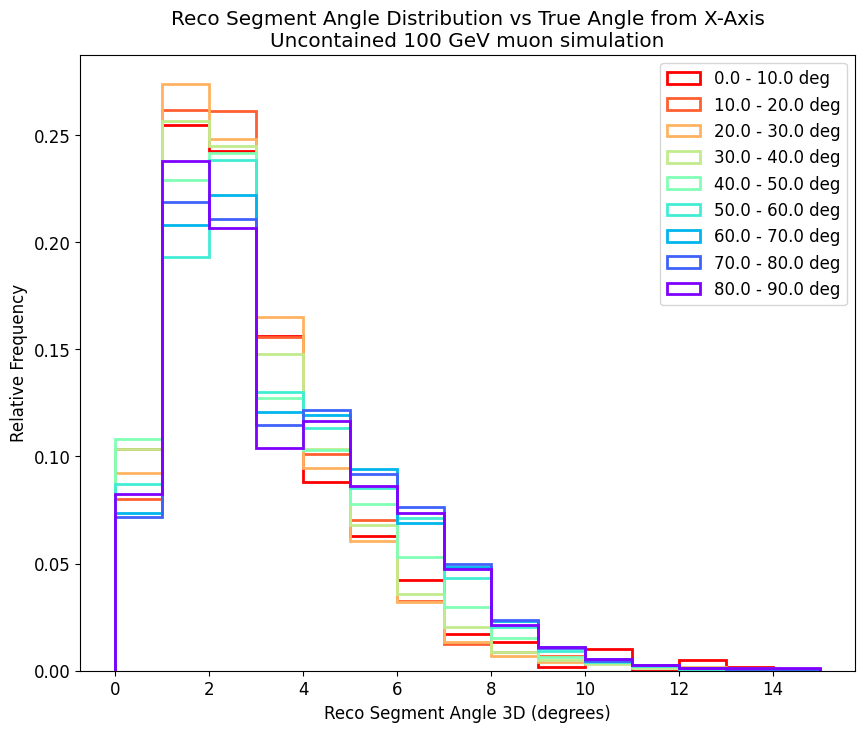

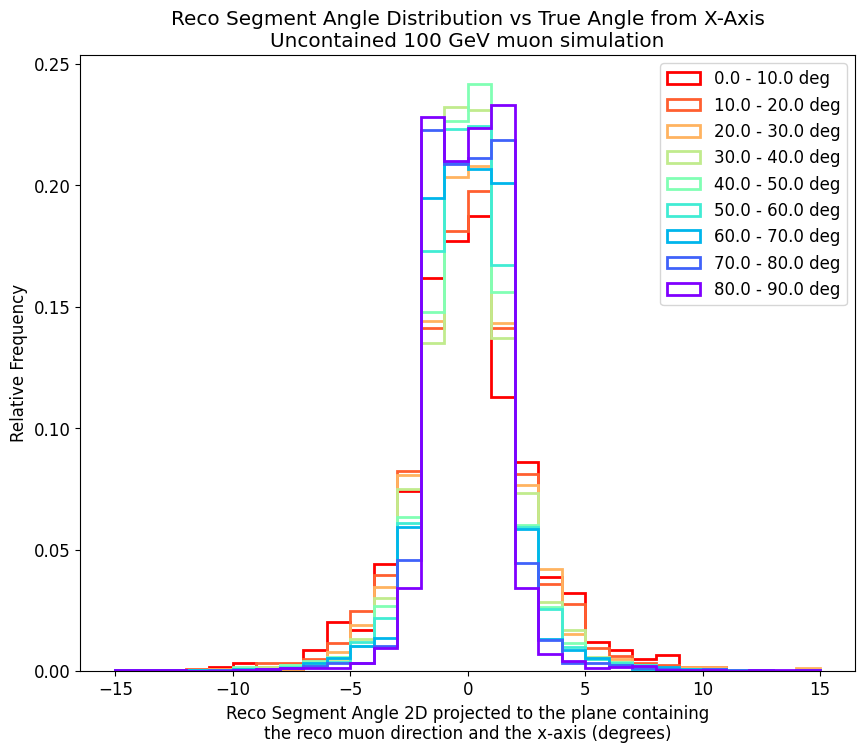

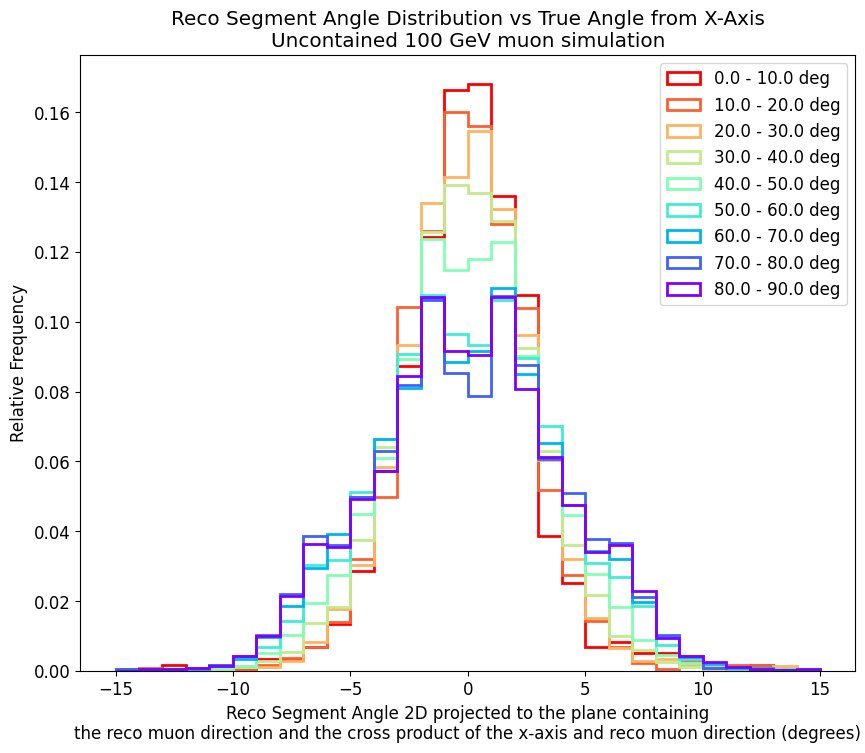

In [12]:
#for angle_type in ["3d", "xy", "yz", "xz", "x_muondir", "perpx_muondir"]:
for angle_type in ["3d", "x_muondir", "perpx_muondir"]:

    if angle_type == "3d":
        segment_angles = uncontained_high_energy_df['reco_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 3D (degrees)'
        bins = np.linspace(0, 15, 16)
    elif angle_type == "xy":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_xy'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to XY (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "yz":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_yz'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to YZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "xz":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_xz'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to XZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "x_muondir":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_x_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe reco muon direction and the x-axis (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "perpx_muondir":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_perpx_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe reco muon direction and the cross product of the x-axis and reco muon direction (degrees)'
        bins = np.linspace(-15, 15, 31)
    segment_angles_by_x_angle = []

    x_angle_bins = np.linspace(0, 90, 10)
    x_angles = uncontained_high_energy_df['true_angle_from_x_axis'].to_numpy()
    for i in range(len(x_angle_bins) - 1):
        curr_mask = (x_angles >= x_angle_bins[i]) & (x_angles < x_angle_bins[i+1])
        curr_segment_angles = segment_angles[curr_mask]
        total_segment_angles = np.array([])
        for event_segment_angles in curr_segment_angles:
            total_segment_angles = np.concatenate([total_segment_angles, event_segment_angles])
        segment_angles_by_x_angle.append(total_segment_angles)

    rainbow_colors = plt.cm.rainbow(np.linspace(1, 0, len(x_angle_bins) - 1))

    plt.figure(figsize=(10, 8))
    for i in range(len(x_angle_bins) - 1):
        plt.hist(segment_angles_by_x_angle[i], bins=bins, histtype='step', density=True, label=f'{x_angle_bins[i]} - {x_angle_bins[i+1]} deg', lw=2, color=rainbow_colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Relative Frequency')
    plt.title('Reco Segment Angle Distribution vs True Angle from X-Axis\nUncontained 100 GeV muon simulation')
    plt.legend()
    plt.show()


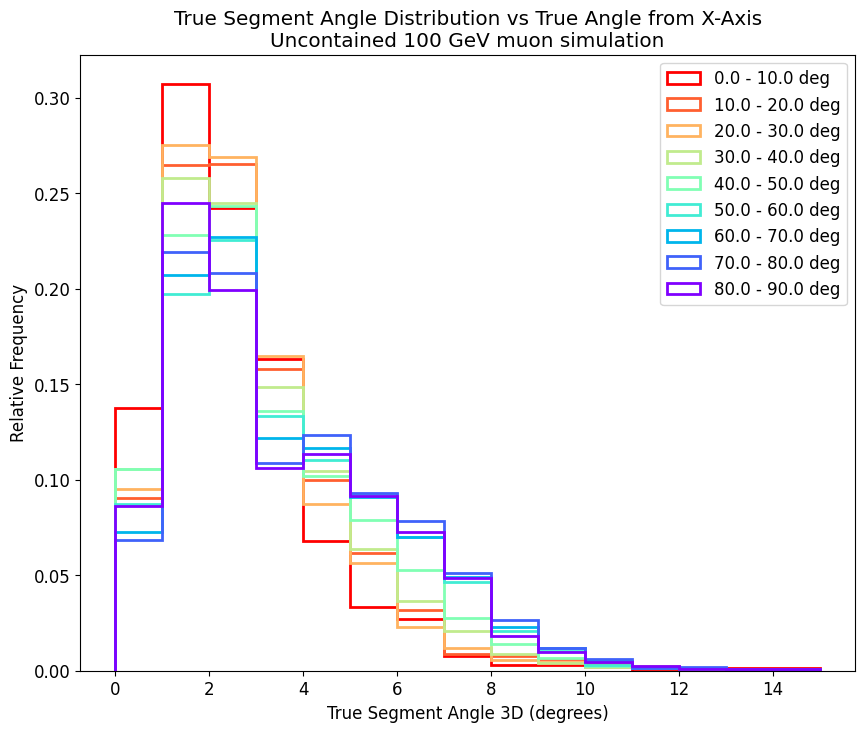

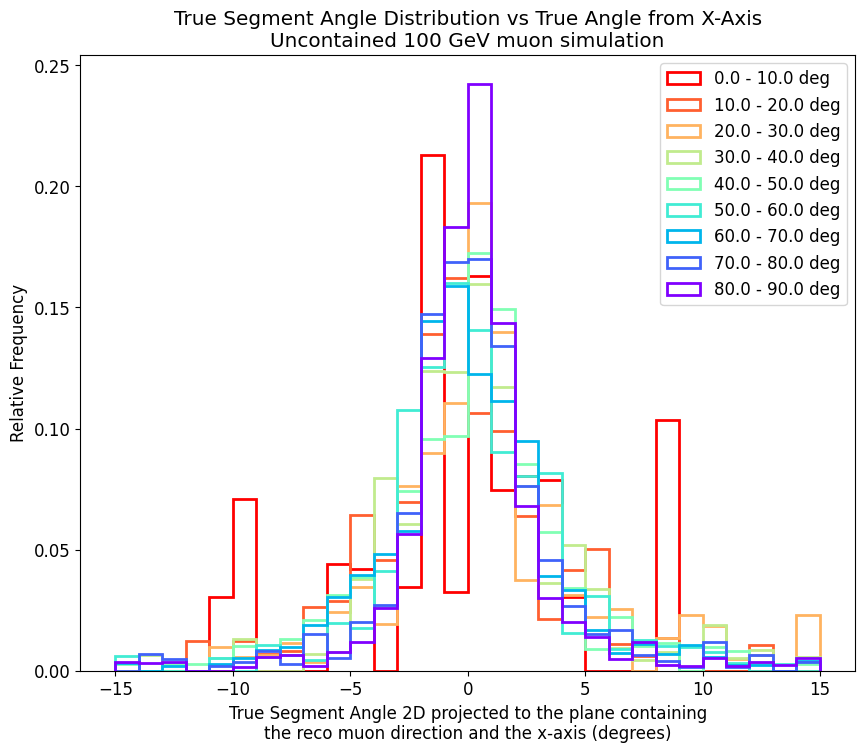

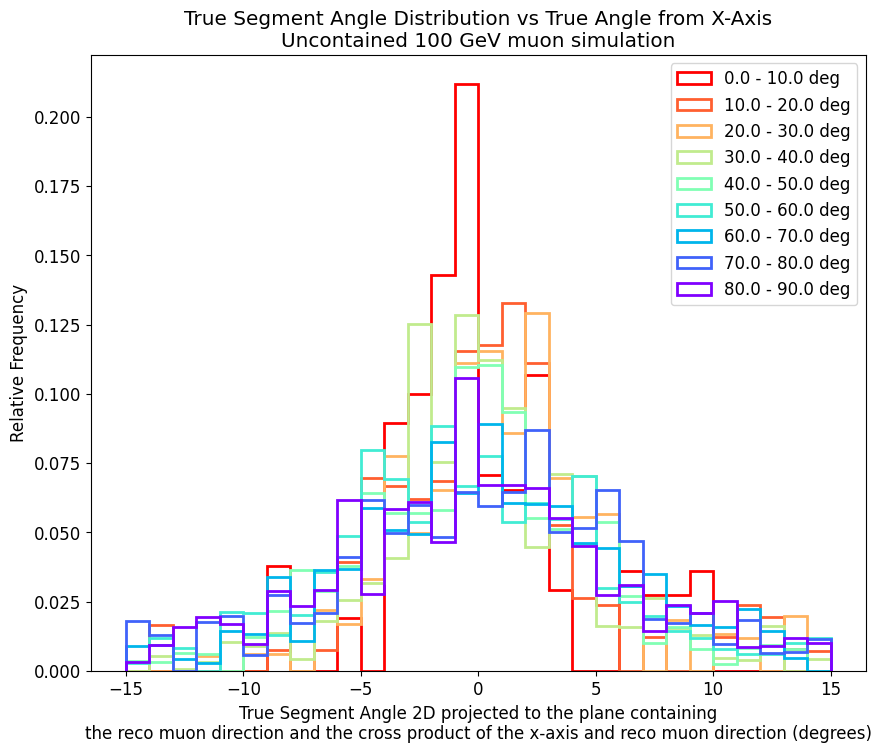

In [13]:
#for angle_type in ["3d", "xy", "yz", "xz", "x_muondir", "perpx_muondir"]:
for angle_type in ["3d", "x_muondir", "perpx_muondir"]:

    if angle_type == "3d":
        segment_angles = uncontained_high_energy_df['true_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 3D (degrees)'
        bins = np.linspace(0, 15, 16)
    elif angle_type == "xy":
        segment_angles = uncontained_high_energy_df['true_2d_angle_xy'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to XY (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "yz":
        segment_angles = uncontained_high_energy_df['true_2d_angle_yz'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to YZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "xz":
        segment_angles = uncontained_high_energy_df['true_2d_angle_xz'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to XZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "x_muondir":
        segment_angles = uncontained_high_energy_df['true_2d_angle_x_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to the plane containing\nthe reco muon direction and the x-axis (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "perpx_muondir":
        segment_angles = uncontained_high_energy_df['true_2d_angle_perpx_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'True Segment Angle 2D projected to the plane containing\nthe reco muon direction and the cross product of the x-axis and reco muon direction (degrees)'
        bins = np.linspace(-15, 15, 31)
    segment_angles_by_x_angle = []

    x_angle_bins = np.linspace(0, 90, 10)
    x_angles = uncontained_high_energy_df['true_angle_from_x_axis'].to_numpy()
    for i in range(len(x_angle_bins) - 1):
        curr_mask = (x_angles >= x_angle_bins[i]) & (x_angles < x_angle_bins[i+1])
        curr_segment_angles = segment_angles[curr_mask]
        total_segment_angles = np.array([])
        for event_segment_angles in curr_segment_angles:
            total_segment_angles = np.concatenate([total_segment_angles, event_segment_angles])
        segment_angles_by_x_angle.append(total_segment_angles)

    rainbow_colors = plt.cm.rainbow(np.linspace(1, 0, len(x_angle_bins) - 1))

    plt.figure(figsize=(10, 8))
    for i in range(len(x_angle_bins) - 1):
        plt.hist(segment_angles_by_x_angle[i], bins=bins, histtype='step', density=True, label=f'{x_angle_bins[i]} - {x_angle_bins[i+1]} deg', lw=2, color=rainbow_colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Relative Frequency')
    plt.title('True Segment Angle Distribution vs True Angle from X-Axis\nUncontained 100 GeV muon simulation')
    plt.legend()
    plt.show()


In [14]:
hardest_angles = uncontained_high_energy_df['reco_2d_angle_perpx_muondir'].to_numpy() * 180 / np.pi
x_angles = uncontained_high_energy_df['true_angle_from_x_axis'].to_numpy()
reco_segment_dirs = uncontained_high_energy_df['reco_segment_dirs'].to_numpy()
files = uncontained_high_energy_df['file'].to_numpy()
for i in range(len(hardest_angles)):
    max_angle = np.max(hardest_angles[i])
    if 10 < max_angle < 15 and x_angles[i] > 89:
        print(i, files[i], max_angle, x_angles[i])
        print(reco_segment_dirs[i])


412 larcv_mc_20250625_003731_638351_a06dc92b-3525-4812-9e72-8207811b52ed_spine.h5 11.731548152902024 89.767166
[[ 2.1268265e-02 -2.1266101e-02  9.9954760e-01]
 [ 1.5908996e-04 -4.2356294e-02  9.9910253e-01]
 [ 2.4489984e-06 -6.6190987e-04  9.9999982e-01]
 [ 0.0000000e+00 -7.4731484e-02  9.9720371e-01]
 [ 0.0000000e+00  1.0255599e-02  9.9994743e-01]
 [-2.1335427e-02  1.8880909e-04  9.9977231e-01]
 [-9.3333940e-05  8.0808604e-07  1.0000000e+00]
 [-1.0698928e-06  0.0000000e+00  1.0000000e+00]
 [ 0.0000000e+00 -2.1328410e-02  9.9977249e-01]
 [ 0.0000000e+00 -2.1273360e-02  9.9977368e-01]
 [ 0.0000000e+00 -2.1270946e-02  9.9977374e-01]
 [ 0.0000000e+00 -2.1726428e-02  9.9976391e-01]
 [ 0.0000000e+00 -1.1464421e-04  1.0000000e+00]
 [ 0.0000000e+00 -6.4269379e-02  9.9793261e-01]
 [ 0.0000000e+00 -1.7310322e-05  1.0000000e+00]
 [-2.1115592e-02  0.0000000e+00  9.9977708e-01]
 [ 2.1095620e-02 -2.1407450e-02  9.9954826e-01]
 [-2.1231305e-02 -1.9997156e-05  9.9977458e-01]
 [-1.7387870e-04 -2.68331